Importing the dependencies/libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data collection

In [17]:
# Laoding the dataset to a pandas dataframe
wineDataSet = pd.read_csv('/winequality-red.csv')
wineDataSet.shape

(1599, 12)

In [18]:
# Checking number of rows and columns
wineDataSet.shape

(1599, 12)

In [19]:
#Checking the first 5 rows of the dataset
wineDataSet.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
#Checking if there are any null values in any column
wineDataSet.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Data analysis and visualisation

In [21]:
#Checking the statistical measures of the dataset
wineDataSet.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


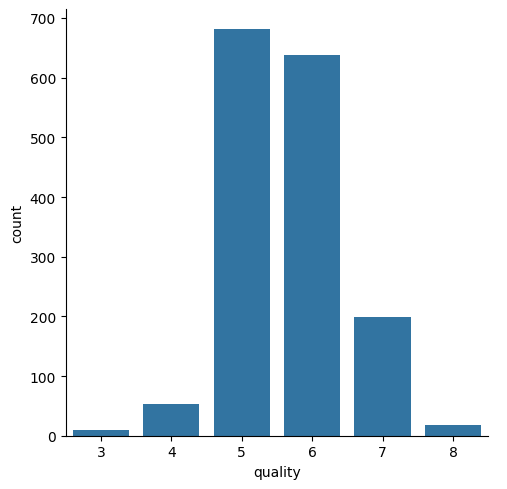

In [22]:
# Number of values for each quality
sns.catplot(x='quality', data=wineDataSet, kind= 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

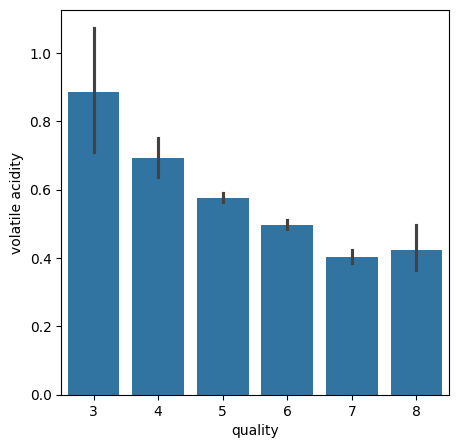

In [23]:
#volatile acidity vs quality
# To make the bar graph fit into a square:-
plot = plt.figure(figsize=(5,5))
# Now the actual plot:-
sns.barplot(x='quality', y='volatile acidity', data=wineDataSet)

Correlation of columns

<Axes: >

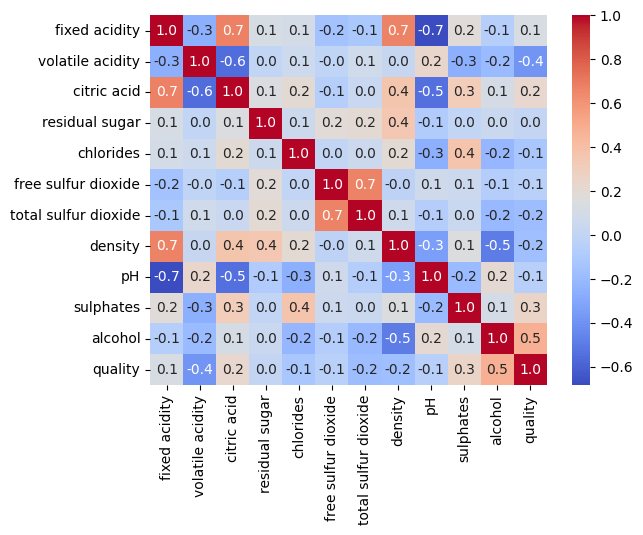

In [24]:
correlation = wineDataSet.corr()
#cbar is the color bar on the right hand side, fmt .1f means we take the values upto 1 floating point decimal place, annot true means we want the names of labels showing
sns.heatmap(correlation, cbar=True, fmt='.1f', annot=True, cmap='coolwarm')

Data pre processing

In [25]:
#Seperate the data and the label
x= wineDataSet.drop('quality', axis=1)
print(x)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Label binarization

In [26]:
y= wineDataSet['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


Train Test Split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.2 , random_state=3)
print(y.shape, y_train.shape, y_test.shape)

(1599,) (1279,) (320,)


RandomForestClassifier()

Model training: Random forest classification

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

Model Evaluation : Accuracy score

In [30]:
x_test_predection = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predection, y_test)
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.93125


Building a Predictive System

In [34]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

# Converting input data tupple to numpy array
input_array = np.asarray(input_data)

# Reshaping the np array because we only want prediction of one instance
input_data_reshaped = input_array.reshape(1 , -1)

prediction = model.predict(input_data_reshaped)

if(prediction == 1):
  print("Good quality wine")
else:
  print("Bad quality wine")

Good quality wine


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import gradio as gr
import numpy as np

def predict_quality(fixed_acidity, volatile_acidity, citric_acid, residual_sugar,
                    chlorides, free_sulfur_dioxide, total_sulfur_dioxide,
                    density, pH, sulphates, alcohol):
    
    # Put features in correct order and shape for prediction
    features = np.array([[fixed_acidity, volatile_acidity, citric_acid, residual_sugar,
                          chlorides, free_sulfur_dioxide, total_sulfur_dioxide,
                          density, pH, sulphates, alcohol]])
    
    prediction = model.predict(features)
    if(prediction[0]==1):
      op = "Good wine"
    else: 
      op= "Bad wine"
    return f"Predicted Wine Quality: {op}"

# Define the UI
inputs = [
    gr.Number(label="Fixed Acidity"),
    gr.Number(label="Volatile Acidity"),
    gr.Number(label="Citric Acid"),
    gr.Number(label="Residual Sugar"),
    gr.Number(label="Chlorides"),
    gr.Number(label="Free Sulfur Dioxide"),
    gr.Number(label="Total Sulfur Dioxide"),
    gr.Number(label="Density"),
    gr.Number(label="pH"),
    gr.Number(label="Sulphates"),
    gr.Number(label="Alcohol"),
]

gr.Interface(fn=predict_quality, inputs=inputs, outputs="text", title="Wine Quality Predictor").launch()
